1. 從 goodinfo 讀取 交易狀況
2. 將 Nan 值 刪除
3. 抓取出 股價最高 或 最低 前 20 檔

1. 按 F12
2. Click Network
3. Name: copy 網址
4. click StockList.asp, 選Headers:
    可以從這裡 copy 網址
    copy user-agent 

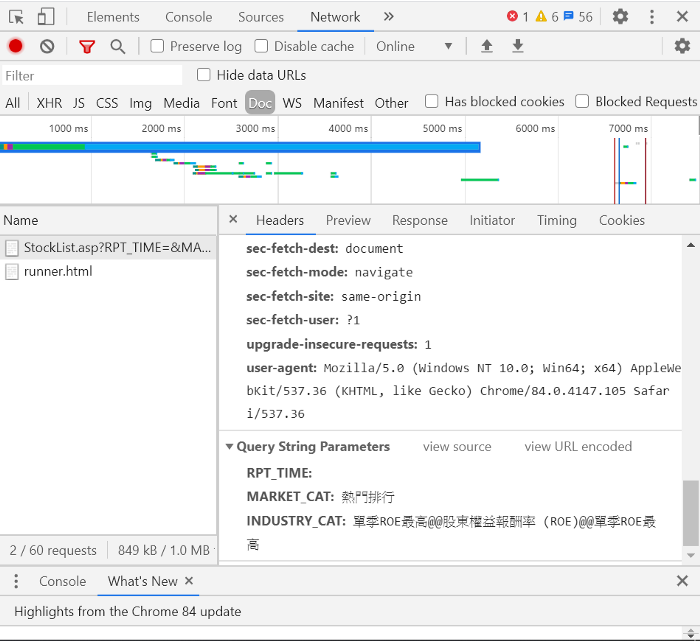

In [ ]:
# 找出 股價最小 前20 檔
#print(pd.to_numeric(dfs_update02['成交'],errors='coerce').nsmallest(20,keep='all'))

# 主要 爬蟲函數

In [8]:
import bs4
import requests
import pandas as pd

# 自己平台的 user-agent, 可打開網頁，按下 F12 取得
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}

In [9]:
def GetStockListData(url, headers):
    res = requests.get(url,headers=headers)
    res.encoding = "utf-8"
    
    soup = bs4.BeautifulSoup(res.text,"lxml")
    data = soup.select_one("#txtStockListData")
    
    df = pd.read_html(data.prettify())
    
    dfs = df[1]
    dfs.head()

    dfs.columns = dfs.columns.get_level_values(13)
    return dfs
#dfs_dataframe = GetStockListData(url, headers)
#dfs_dataframe.to_csv('StockListData.csv')

## 0. 取得 月營收資訊

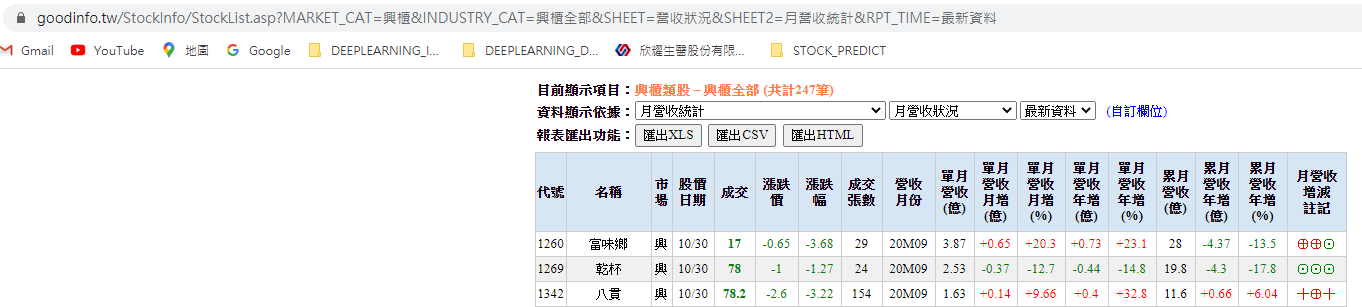

In [10]:
#goodinfo 累計季獲利能力
url = "https://goodinfo.tw/StockInfo/StockList.asp?MARKET_CAT=%E8%88%88%E6%AB%83&INDUSTRY_CAT=%E8%88%88%E6%AB%83%E5%85%A8%E9%83%A8&SHEET=%E7%87%9F%E6%94%B6%E7%8B%80%E6%B3%81&SHEET2=%E6%9C%88%E7%87%9F%E6%94%B6%E7%B5%B1%E8%A8%88&RPT_TIME=%E6%9C%80%E6%96%B0%E8%B3%87%E6%96%99"
dfs_month_Revenue = GetStockListData(url, headers)
dfs_month_Revenue.to_csv('./csv_file/month_Revenue.csv')

In [11]:
dfs_month_Revenue

,代號,名稱,市 場,股價 日期,成交,漲跌 價,漲跌 幅,成交 張數,營收 月份,單月 營收 (億),單月 營收 月增 (億),單月 營收 月增 (%),單月 營收 年增 (億),單月 營收 年增 (%),累月 營收 (億),累月 營收 年增 (億),累月 營收 年增 (%),月營收 增減 註記
0,1260,富味鄉,興,11/12,16.60,-0.55,-3.21,10.0,20M10,3.25,-0.62,-16.00,-0.01,-0.22,31.30,-4.37,-12.30,⊙ － ⊙
1,1269,乾杯,興,11/12,76.80,-0.40,-0.52,6.0,20M10,2.74,0.21,8.37,0.27,11.00,22.60,-4.03,-15.20,＋ ⊕ ⊙
2,1342,八貫,興,11/12,74.90,0.30,0.40,30.0,20M10,1.18,-0.45,-27.30,0.13,11.90,12.80,0.79,6.55,⊙ ⊕ ＋
3,1563,巧新,興,11/12,51.40,-0.40,-0.77,134.0,20M10,5.49,0.13,2.33,0.23,4.29,42.90,-8.11,-15.90,＋ ＋ ⊙
4,1585,鎧鉅,興,11/12,7.89,0.00,0.00,NaN,20M10,0.10,-0.02,-18.80,-0.03,-21.70,1.03,-0.52,-33.60,⊙ ⊙ ⊙
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,8487,愛爾達,興,11/12,19.00,0.00,0.00,NaN,20M10,0.47,0.06,13.60,-0.14,-22.80,4.10,-0.35,-7.85,⊕ ⊙ －
245,8490,利得,興,11/12,11.05,0.25,2.31,39.0,20M10,0.02,0.00,24.80,-0.01,-25.80,0.24,-0.02,-6.49,⊕ ⊙ －
246,8491,真好玩,興,11/12,25.00,-0.10,-0.40,54.0,20M10,0.73,-0.23,-23.80,-0.22,-23.20,7.95,-9.06,-53.30,⊙ ⊙ ⊙
247,8492,兔將,興,11/12,22.35,0.00,0.00,NaN,20M10,0.18,0.01,5.08,0.05,38.70,1.25,-1.23,-49.60,＋ ⊕ ⊙


In [11]:
dfs_month_Revenue['代號'][0] 

1260

In [57]:
dfs_month_Revenue[0:2]

,代號,名稱,市 場,股價 日期,成交,漲跌 價,漲跌 幅,成交 張數,營收 月份,單月 營收 (億),單月 營收 月增 (億),單月 營收 月增 (%),單月 營收 年增 (億),單月 營收 年增 (%),累月 營收 (億),累月 營收 年增 (億),累月 營收 年增 (%),月營收 增減 註記
0,1260,富味鄉,興,11/09,17.15,-0.1,-0.58,21.0,20M09,3.87,0.65,20.3,0.73,23.1,28.0,-4.37,-13.5,⊕ ⊕ ⊙
1,1269,乾杯,興,11/09,76.50,0.0,0.00,15.0,20M09,2.53,-0.37,-12.7,-0.44,-14.8,19.8,-4.30,-17.8,⊙ ⊙ ⊙


In [60]:
dfs_month = dfs_month_Revenue[3:4]

In [61]:
dfs_month

,代號,名稱,市 場,股價 日期,成交,漲跌 價,漲跌 幅,成交 張數,營收 月份,單月 營收 (億),單月 營收 月增 (億),單月 營收 月增 (%),單月 營收 年增 (億),單月 營收 年增 (%),累月 營收 (億),累月 營收 年增 (億),累月 營收 年增 (%),月營收 增減 註記
3,1563,巧新,興,11/09,50.9,0.1,0.2,180.0,20M10,5.49,0.13,2.33,0.23,4.29,42.9,-8.11,-15.9,＋ ＋ ⊙


In [129]:
#df_month_Reven =  dfs_month_Revenue.columns
df_month_Reven = []
df_month_new = []
num = [1563, 1260, 1269, 9957, 8492]
#num = [1563, 1260, 1269]

In [127]:
for k in range(len(num)):
    if k == 0:  #使用 dataframe 合併的方式， 所以先取得第0行資料
        for i in range(len(dfs_month_Revenue)):
            if dfs_month_Revenue['代號'][i] ==num[0]:
                df_month_Reven = dfs_month_Revenue[i:i+1]
    else:
        for j in range(len(dfs_month_Revenue)):
            if dfs_month_Revenue['代號'][j] ==num[k]:
                df_month_Reven = pd.concat([df_month_Reven,dfs_month_Revenue[j:j+1]])

## 從csv 檔，找出個股資料

In [131]:
def get_stock_data_from_dataframe(dfs_month_Revenue, stock_num):
    """ dfs_month_Revenue: 原始 dataframe
        stock_num： 一個陣列如：[1563, 1260, 1269, 9957, 8492]
    """
    df_stock_data = []
    for k in range(len(stock_num)):
        if k == 0:  #使用 dataframe 合併的方式， 所以先取得第0行資料
            for i in range(len(dfs_month_Revenue)):
                if dfs_month_Revenue['代號'][i] ==stock_num[0]:
                    df_stock_data = dfs_month_Revenue[i:i+1]
        else:
            for j in range(len(dfs_month_Revenue)):
                if dfs_month_Revenue['代號'][j] ==stock_num[k]:
                    df_stock_data = pd.concat([df_stock_data,dfs_month_Revenue[j:j+1]])
    return df_stock_data

In [134]:
dfs_stock_month_Revenue_data = get_stock_data_from_dataframe(dfs_month_Revenue, num)

In [135]:
dfs_stock_month_Revenue_data

,代號,名稱,市 場,股價 日期,成交,漲跌 價,漲跌 幅,成交 張數,營收 月份,單月 營收 (億),單月 營收 月增 (億),單月 營收 月增 (%),單月 營收 年增 (億),單月 營收 年增 (%),累月 營收 (億),累月 營收 年增 (億),累月 營收 年增 (%),月營收 增減 註記
3,1563,巧新,興,11/10,52.00,1.10,2.16,394.0,20M10,5.49,0.13,2.33,0.23,4.29,42.90,-8.11,-15.9,＋ ＋ ⊙
0,1260,富味鄉,興,11/10,17.00,-0.15,-0.87,24.0,20M09,3.87,0.65,20.30,0.73,23.10,28.00,-4.37,-13.5,⊕ ⊕ ⊙
1,1269,乾杯,興,11/10,76.90,0.40,0.52,13.0,20M09,2.53,-0.37,-12.70,-0.44,-14.80,19.80,-4.30,-17.8,⊙ ⊙ ⊙
248,9957,燁聯,興,11/10,5.03,-0.02,-0.40,206.0,20M09,34.40,-0.71,-2.03,-0.85,-2.39,279.00,-54.70,-16.4,－ － ⊙
247,8492,兔將,興,11/10,22.95,-0.05,-0.22,28.0,20M09,0.17,0.00,1.85,0.05,40.50,1.07,-1.28,-54.5,＋ ⊕ ⊙


In [40]:
df_month_Revenue = pd.read_csv('./csv_file/1_month_Revenue.csv')
df_label_list = ['Unnamed: 0', '市  場', '漲跌  價', '漲跌  幅', '成交  張數', 
                 '單月  營收  月增  (億)', '單月  營收  年增  (億)', '累月  營收  年增  (億)', '月營收  增減  註記']
df_month_Revenue = df_month_Revenue.drop(df_label_list, axis=1)
df_month_Revenue

,代號,名稱,股價 日期,成交,營收 月份,單月 營收 (億),單月 營收 月增 (%),單月 營收 年增 (%),累月 營收 (億),累月 營收 年增 (%)
0,1260,富味鄉,11/10,17.00,20M10,3.25,-16.00,-0.22,31.30,-12.30
1,1269,乾杯,11/10,76.90,20M10,2.74,8.37,11.00,22.60,-15.20
2,1342,八貫,11/10,74.90,20M10,1.18,-27.30,11.90,12.80,6.55
3,1563,巧新,11/10,52.00,20M10,5.49,2.33,4.29,42.90,-15.90
4,1585,鎧鉅,11/10,7.89,20M10,0.10,-18.80,-21.70,1.03,-33.60
...,...,...,...,...,...,...,...,...,...,...
244,8487,愛爾達,11/10,18.40,20M10,0.47,13.60,-22.80,4.10,-7.85
245,8490,利得,11/10,11.20,20M10,0.02,24.80,-25.80,0.24,-6.49
246,8491,真好玩,11/10,25.10,20M10,0.73,-23.80,-23.20,7.95,-53.30
247,8492,兔將,11/10,22.95,20M10,0.18,5.08,38.70,1.25,-49.60


In [38]:
df_month_Revenue.columns

Index(['Unnamed: 0', '代號', '名稱', '市  場', '股價  日期', '成交', '漲跌  價', '漲跌  幅',
       '成交  張數', '營收  月份', '單月  營收  (億)', '單月  營收  月增  (億)', '單月  營收  月增  (%)',
       '單月  營收  年增  (億)', '單月  營收  年增  (%)', '累月  營收  (億)', '累月  營收  年增  (億)',
       '累月  營收  年增  (%)', '月營收  增減  註記'],
      dtype='object')

In [15]:
Score_List = []
for i in range(5):
    Score_List.append(i)

In [16]:
Score_List

[0, 1, 2, 3, 4]

### 目前有哪一些公司已經公佈 10月 營收

In [5]:
fliter_month_Revenue = (dfs_month_Revenue['營收  月份'] == "20M10")
dfs_month_Revenue[fliter_month_Revenue]

,代號,名稱,市 場,股價 日期,成交,漲跌 價,漲跌 幅,成交 張數,營收 月份,單月 營收 (億),單月 營收 月增 (億),單月 營收 月增 (%),單月 營收 年增 (億),單月 營收 年增 (%),累月 營收 (億),累月 營收 年增 (億),累月 營收 年增 (%),月營收 增減 註記
3,1563,巧新,興,11/09,50.90,0.10,0.20,180.0,20M10,5.49,0.13,2.33,0.23,4.29,42.90,-8.11,-15.90,＋ ＋ ⊙
6,1780,立弘,興,11/09,17.50,-0.15,-0.85,23.0,20M10,0.41,-0.13,-23.90,-0.03,-7.66,5.10,-0.51,-9.01,⊙ － －
7,2071,震南鐵,興,11/09,21.05,0.00,0.00,NaN,20M10,1.31,-0.35,-21.00,0.27,26.50,15.10,1.38,10.00,⊙ ⊕ ⊕
9,2237,華德動能,興,11/09,19.40,-0.05,-0.26,114.0,20M10,0.00,0.00,135.00,-0.06,-96.10,0.07,-1.52,-95.70,⊕ ⊙ ⊙
10,2245,詠勝昌,興,11/09,23.85,0.15,0.63,1.0,20M10,0.32,-0.02,-5.86,0.06,25.60,2.84,0.17,6.29,－ ⊕ ＋
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,7516,清淨海,興,11/09,10.90,0.00,0.00,0.0,20M10,0.16,-0.01,-3.13,0.01,9.71,1.82,0.17,10.10,－ ＋ ⊕
233,8045,達運光電,興,11/09,10.25,0.05,0.49,27.0,20M10,1.21,0.28,30.20,0.21,21.10,8.36,-1.27,-13.20,⊕ ⊕ ⊙
235,8119,公信,興,11/09,17.45,0.05,0.29,71.0,20M10,0.83,0.23,37.40,-0.98,-54.10,13.20,-2.44,-15.60,⊕ ⊙ ⊙
236,8179,旭德,興,11/09,12.50,0.35,2.88,232.0,20M10,3.74,0.26,7.46,0.54,17.00,31.70,4.62,17.00,＋ ⊕ ⊕


In [25]:
dfs_month_Revenue.columns[13]

'單月  營收  年增  (%)'

## 1. 取得 累計季獲利能力

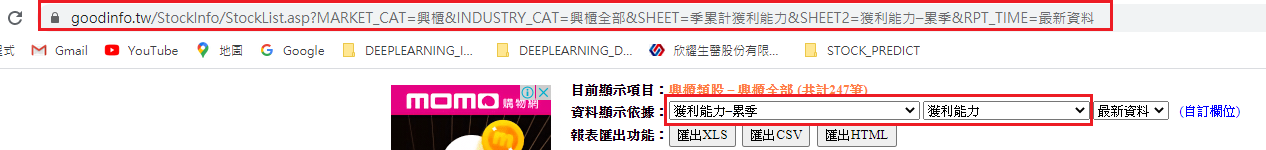

In [6]:
#goodinfo 累計季獲利能力
url = "https://goodinfo.tw/StockInfo/StockList.asp?MARKET_CAT=%E8%88%88%E6%AB%83&INDUSTRY_CAT=%E8%88%88%E6%AB%83%E5%85%A8%E9%83%A8&SHEET=%E5%AD%A3%E7%B4%AF%E8%A8%88%E7%8D%B2%E5%88%A9%E8%83%BD%E5%8A%9B&SHEET2=%E7%8D%B2%E5%88%A9%E8%83%BD%E5%8A%9B%E2%80%93%E7%B4%AF%E5%AD%A3&RPT_TIME=%E6%9C%80%E6%96%B0%E8%B3%87%E6%96%99"
dfs_Profitability = GetStockListData(url, headers)
dfs_Profitability.to_csv('./csv_file/Profitability.csv')

In [7]:
dfs_Profitability

,代號,名稱,成交,財報 季度,營收 (億),營收 成長 (%),毛利 (億),毛利 成長 (%),淨利 (億),淨利 成長 (%),...,淨率 增減,EPS (元),EPS 增減 (元),累季 ROE (%),累季 ROE 增減,年估 ROE (%),累季 ROA (%),累季 ROA 增減,年估 ROA (%),財報 評分
0,1260,富味鄉,17.15,20Q2,17.60,-22.4,1.85,-43.00,0.09,-91.20,...,-3.79,0.08,-0.87,0.44,-4.47,0.88,0.23,-2.42,0.47,36
1,1269,乾杯,76.50,20Q2,11.90,-14.0,5.86,-23.10,-0.36,-244.00,...,-4.80,-1.92,-3.26,-4.01,-6.83,-8.03,-1.63,-2.87,-3.26,41
2,1342,八貫,74.30,20Q2,7.12,10.9,1.68,4.36,0.89,2.13,...,-1.07,1.44,-0.06,8.54,-2.31,17.10,5.50,-0.77,11.00,61
3,1563,巧新,50.90,20Q2,23.50,-23.0,0.48,-93.60,-1.90,-136.00,...,-25.40,-0.97,-3.69,-2.67,-9.90,-5.34,-1.13,-4.16,-2.26,25
4,1585,鎧鉅,7.89,20Q2,0.60,-39.3,-0.59,-396.00,-1.14,-124.00,...,-140.00,-2.10,-1.16,-47.80,-34.00,-95.70,-12.20,-7.32,-24.40,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,8487,愛爾達,18.40,20Q2,2.28,-18.2,0.34,-18.30,0.00,-101.00,...,-1.56,0.00,-0.21,-0.01,-1.68,-0.02,0.00,-1.01,-0.01,32
245,8490,利得,11.20,20Q2,0.16,-5.2,0.04,-25.10,-0.33,-34.50,...,-61.30,-0.73,-0.18,-11.80,-4.82,-23.70,-8.60,-2.88,-17.20,34
246,8491,真好玩,25.70,20Q2,4.13,-66.1,2.02,-66.00,-0.02,-102.00,...,-8.28,-0.08,-3.92,-0.59,-24.80,-1.18,-0.35,-13.50,-0.70,34
247,8492,兔將,23.00,20Q2,0.62,-67.8,0.05,-90.90,-0.17,-151.00,...,-45.70,-0.80,-2.39,-7.32,-21.00,-14.60,-5.78,-16.50,-11.60,36


### 目前有哪一些公司已經公佈 Q3 季財報

In [15]:
fliter = (dfs_Profitability['財報  季度'] == "20Q3")
dfs_Profitability[fliter]

,代號,名稱,成交,財報 季度,營收 (億),營收 成長 (%),毛利 (億),毛利 成長 (%),淨利 (億),淨利 成長 (%),...,淨率 增減,EPS (元),EPS 增減 (元),累季 ROE (%),累季 ROE 增減,年估 ROE (%),累季 ROA (%),累季 ROA 增減,年估 ROA (%),財報 評分
84,4945,陞達科技,64.0,20Q3,2.90,16.1,1.34,26.4,0.40,32.8,...,1.74,1.55,0.38,9.35,2.23,12.5,7.87,1.83,10.5,68
210,6762,達亞,326.0,20Q3,4.08,45.7,2.46,84.1,1.51,130.0,...,13.60,8.20,4.39,38.30,14.40,51.1,26.50,9.02,35.3,91


In [45]:
dfs_Profitability = pd.read_csv('./csv_file/2_Profitability.csv')
dfs_Profitability_label_list = ['Unnamed: 0', '成交', '營收  (億)', '毛利  (億)', '淨利  (億)', '累季  ROE  (%)', 
                               '累季  ROE  增減', '年估  ROE  (%)', '累季  ROA  (%)', '累季  ROA  增減', '年估  ROA  (%)']
dfs_Profitability = dfs_Profitability.drop(dfs_Profitability_label_list, axis=1)
dfs_Profitability.columns

,代號,名稱,財報 季度,營收 成長 (%),毛利 成長 (%),淨利 成長 (%),毛利 (%),毛率 增減,淨利 (%),淨率 增減,EPS (元),EPS 增減 (元),財報 評分
100,5297,廣化,20Q2,-57.90,-62.0,-271.00,39.70,-4.32,-31.10,-38.80,-0.82,-1.30,39
101,5547,久舜,20Q2,69.70,19.5,632.00,10.20,-4.28,3.09,2.37,0.57,0.49,41
102,5859,遠壽,20Q2,-7.61,56.2,110.00,7.03,2.87,3.29,1.84,1.16,0.61,39
103,5863,瑞興銀,20Q2,10.10,NaN,-4.33,NaN,NaN,14.90,-2.24,0.26,-0.02,38
104,6027,德信,20Q2,-25.40,-28.3,-343.00,92.70,-3.74,-22.00,-28.80,-0.13,-0.18,25


In [42]:
dfs_Profitability.columns

Index(['Unnamed: 0', '代號', '名稱', '成交', '財報  季度', '營收  (億)', '營收  成長  (%)',
       '毛利  (億)', '毛利  成長  (%)', '淨利  (億)', '淨利  成長  (%)', '毛利  (%)', '毛率  增減',
       '淨利  (%)', '淨率  增減', 'EPS  (元)', 'EPS  增減  (元)', '累季  ROE  (%)',
       '累季  ROE  增減', '年估  ROE  (%)', '累季  ROA  (%)', '累季  ROA  增減',
       '年估  ROA  (%)', '財報  評分'],
      dtype='object')

In [141]:
dfs_stock_month_Revenue_data['代號']

3      1563
0      1260
1      1269
248    9957
247    8492
Name: 代號, dtype: int64

In [143]:
stock = dfs_stock_month_Revenue_data['代號'].values.tolist() #將股票代號存入陣列 list
dfs_stock_Profitability_data = get_stock_data_from_dataframe(dfs_Profitability, stock)

In [144]:
dfs_stock_Profitability_data

,代號,名稱,成交,財報 季度,營收 (億),營收 成長 (%),毛利 (億),毛利 成長 (%),淨利 (億),淨利 成長 (%),...,淨率 增減,EPS (元),EPS 增減 (元),累季 ROE (%),累季 ROE 增減,年估 ROE (%),累季 ROA (%),累季 ROA 增減,年估 ROA (%),財報 評分
3,1563,巧新,50.90,20Q2,23.50,-23.0,0.48,-93.6,-1.90,-136.0,...,-25.40,-0.97,-3.69,-2.67,-9.90,-5.34,-1.13,-4.16,-2.26,25
0,1260,富味鄉,17.15,20Q2,17.60,-22.4,1.85,-43.0,0.09,-91.2,...,-3.79,0.08,-0.87,0.44,-4.47,0.88,0.23,-2.42,0.47,36
1,1269,乾杯,76.50,20Q2,11.90,-14.0,5.86,-23.1,-0.36,-244.0,...,-4.80,-1.92,-3.26,-4.01,-6.83,-8.03,-1.63,-2.87,-3.26,41
248,9957,燁聯,5.05,20Q2,184.00,-16.3,-4.54,-348.0,-18.40,2.8,...,-1.37,-0.70,0.02,-12.50,-2.14,-25.00,-3.51,-0.18,-7.02,21
247,8492,兔將,23.00,20Q2,0.62,-67.8,0.05,-90.9,-0.17,-151.0,...,-45.70,-0.80,-2.39,-7.32,-21.00,-14.60,-5.78,-16.50,-11.60,36


## 2. 取得 最近漲跌幅統計

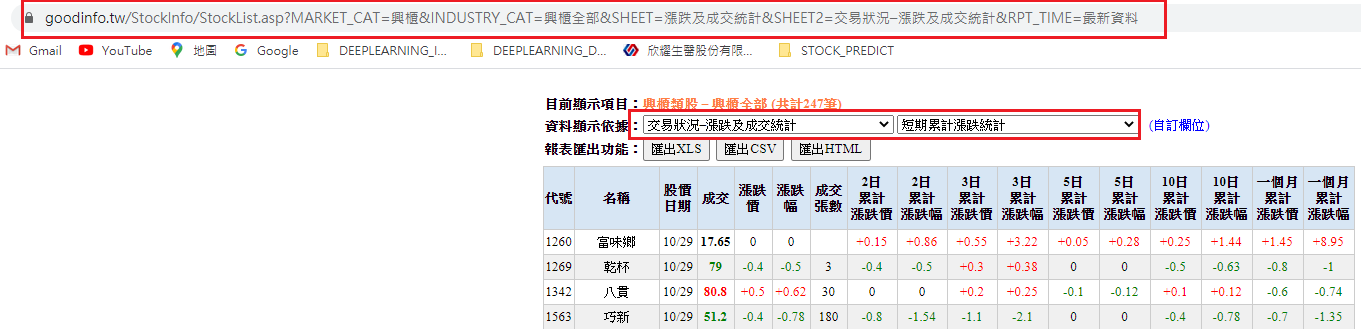

In [50]:
#交易狀況–漲跌及成交統計 ==> 短期累計漲跌統計

url = "https://goodinfo.tw/StockInfo/StockList.asp?MARKET_CAT=%E8%88%88%E6%AB%83&INDUSTRY_CAT=%E8%88%88%E6%AB%83%E5%85%A8%E9%83%A8&SHEET=%E6%BC%B2%E8%B7%8C%E5%8F%8A%E6%88%90%E4%BA%A4%E7%B5%B1%E8%A8%88&SHEET2=%E4%BA%A4%E6%98%93%E7%8B%80%E6%B3%81%E2%80%93%E6%BC%B2%E8%B7%8C%E5%8F%8A%E6%88%90%E4%BA%A4%E7%B5%B1%E8%A8%88&RPT_TIME=%E6%9C%80%E6%96%B0%E8%B3%87%E6%96%99"
dfs_Transaction_Status = GetStockListData(url, headers)

In [51]:
dfs_Transaction_Status

,代號,名稱,股價 日期,成交,漲跌 價,漲跌 幅,成交 張數,2日 累計 漲跌價,2日 累計 漲跌幅,3日 累計 漲跌價,3日 累計 漲跌幅,5日 累計 漲跌價,5日 累計 漲跌幅,10日 累計 漲跌價,10日 累計 漲跌幅,一個月 累計 漲跌價,一個月 累計 漲跌幅
0,1260,富味鄉,10/29,17.65,0.00,0.00,NaN,0.15,0.86,0.55,3.22,0.05,0.28,0.25,1.44,1.45,8.95
1,1269,乾杯,10/29,79.00,-0.40,-0.50,3.0,-0.40,-0.50,0.30,0.38,0.00,0.00,-0.50,-0.63,-0.80,-1.00
2,1342,八貫,10/29,80.80,0.50,0.62,30.0,0.00,0.00,0.20,0.25,-0.10,-0.12,0.10,0.12,-0.60,-0.74
3,1563,巧新,10/29,51.20,-0.40,-0.78,180.0,-0.80,-1.54,-1.10,-2.10,0.00,0.00,-0.40,-0.78,-0.70,-1.35
4,1585,鎧鉅,10/29,8.15,-0.20,-2.40,16.0,-0.11,-1.33,-0.11,-1.33,1.00,14.00,1.00,14.00,1.10,15.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,8487,愛爾達,10/29,18.45,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.82
243,8490,利得,10/29,11.00,0.00,0.00,2.0,0.00,0.00,-0.05,-0.45,0.00,0.00,-0.20,-1.79,-0.55,-4.76
244,8491,真好玩,10/29,25.50,-0.80,-3.04,31.0,-0.75,-2.86,-0.75,-2.86,-0.80,-3.04,-2.00,-7.27,-2.50,-8.93
245,8492,兔將,10/29,20.65,-0.90,-4.18,7.0,-0.90,-4.18,-0.90,-4.18,-0.65,-3.05,-0.75,-3.50,1.55,8.12


In [47]:
dfs_Transaction_Status = pd.read_csv('./csv_file/3_Transaction_Status.csv')
dfs_Transaction_Status.columns

Index(['Unnamed: 0', '代號', '名稱', '股價  日期', '成交', '漲跌  價', '漲跌  幅', '成交  張數',
       '2日  累計  漲跌價', '2日  累計  漲跌幅', '3日  累計  漲跌價', '3日  累計  漲跌幅',
       '5日  累計  漲跌價', '5日  累計  漲跌幅', '10日  累計  漲跌價', '10日  累計  漲跌幅',
       '一個月  累計  漲跌價', '一個月  累計  漲跌幅'],
      dtype='object')

In [48]:
dfs_Transaction_Status_label_list = ['Unnamed: 0', '漲跌  價', '2日  累計  漲跌價', '3日  累計  漲跌價', 
                               '5日  累計  漲跌價', '10日  累計  漲跌價', '一個月  累計  漲跌價']
dfs_Transaction_Status = dfs_Transaction_Status.drop(dfs_Transaction_Status_label_list, axis=1)
dfs_Transaction_Status

,代號,名稱,股價 日期,成交,漲跌 幅,成交 張數,2日 累計 漲跌幅,3日 累計 漲跌幅,5日 累計 漲跌幅,10日 累計 漲跌幅,一個月 累計 漲跌幅
0,1260,富味鄉,11/10,17.00,-0.87,24.0,-1.45,-1.45,-1.16,-2.86,6.92
1,1269,乾杯,11/10,76.90,0.52,13.0,0.52,-0.13,-0.39,-3.15,-5.41
2,1342,八貫,11/10,74.90,0.81,75.0,-2.98,-4.10,-4.46,-7.30,-9.32
3,1563,巧新,11/10,52.00,2.16,394.0,2.36,2.77,2.16,0.00,-0.19
4,1585,鎧鉅,11/10,7.89,0.00,NaN,0.64,5.20,1.15,-4.48,11.90
...,...,...,...,...,...,...,...,...,...,...,...
244,8487,愛爾達,11/10,18.40,0.00,NaN,0.00,0.00,-0.27,-0.27,-2.13
245,8490,利得,11/10,11.20,0.00,1.0,0.00,-0.44,1.36,1.82,-1.75
246,8491,真好玩,11/10,25.10,-2.33,21.0,0.00,0.80,-2.52,-4.38,-12.40
247,8492,兔將,11/10,22.95,-0.22,28.0,8.25,9.29,8.00,6.50,8.00


## 3. 法人累計買賣超統計–三大法人

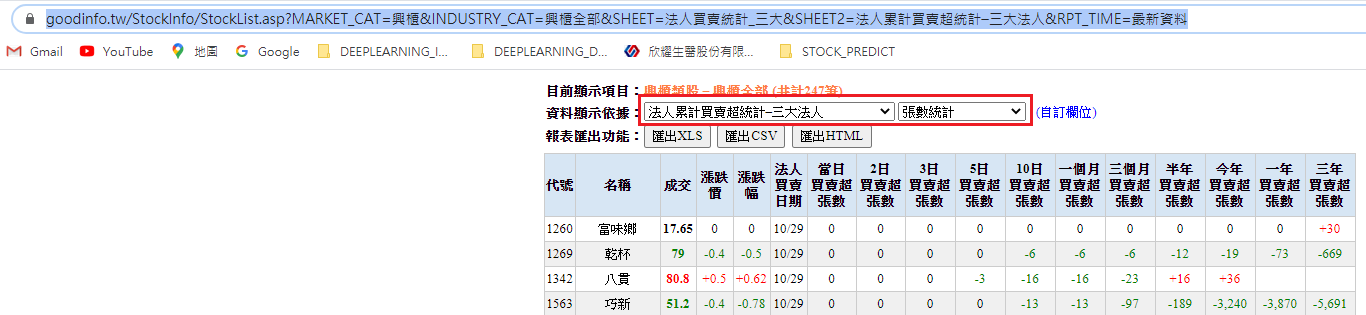

In [52]:
#法人買賣統計_三大' ==> 法人累計買賣超統計–三大法人
url = "https://goodinfo.tw/StockInfo/StockList.asp?MARKET_CAT=%E8%88%88%E6%AB%83&INDUSTRY_CAT=%E8%88%88%E6%AB%83%E5%85%A8%E9%83%A8&SHEET=%E6%B3%95%E4%BA%BA%E8%B2%B7%E8%B3%A3%E7%B5%B1%E8%A8%88_%E4%B8%89%E5%A4%A7&SHEET2=%E6%B3%95%E4%BA%BA%E7%B4%AF%E8%A8%88%E8%B2%B7%E8%B3%A3%E8%B6%85%E7%B5%B1%E8%A8%88%E2%80%93%E4%B8%89%E5%A4%A7%E6%B3%95%E4%BA%BA&RPT_TIME=%E6%9C%80%E6%96%B0%E8%B3%87%E6%96%99"
dfs_3Institutional_Investors = GetStockListData(url, headers)

In [53]:
dfs_3Institutional_Investors

,代號,名稱,成交,漲跌 價,漲跌 幅,法人 買賣 日期,當日 買賣超 張數,2日 買賣超 張數,3日 買賣超 張數,5日 買賣超 張數,10日 買賣超 張數,一個月 買賣超 張數,三個月 買賣超 張數,半年 買賣超 張數,今年 買賣超 張數,一年 買賣超 張數,三年 買賣超 張數
0,1260,富味鄉,17.65,0.00,0.00,10/29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,+30
1,1269,乾杯,79.00,-0.40,-0.50,10/29,0.0,0.0,0.0,0.0,-6.0,-6.0,-6.0,-12,-19,-73,-669
2,1342,八貫,80.80,0.50,0.62,10/29,0.0,0.0,0.0,-3.0,-16.0,-16.0,-23.0,+16,+36,NaN,NaN
3,1563,巧新,51.20,-0.40,-0.78,10/29,0.0,0.0,0.0,0.0,-13.0,-13.0,-97.0,-189,-3240,-3870,-5691
4,1585,鎧鉅,8.15,-0.20,-2.40,10/29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,8487,愛爾達,18.45,0.00,0.00,10/29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,-5
243,8490,利得,11.00,0.00,0.00,10/29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
244,8491,真好玩,25.50,-0.80,-3.04,10/29,0.0,0.0,0.0,0.0,0.0,-8.0,-7.0,-5,-11,-11,-55
245,8492,兔將,20.65,-0.90,-4.18,10/29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,+12,+12,-109


In [52]:
dfs_3Institutional_Investors = pd.read_csv('./csv_file/4_3Institutional_Investors.csv')
dfs_3Institutional_Investors.columns

Index(['Unnamed: 0', '代號', '名稱', '成交', '漲跌  價', '漲跌  幅', '法人  買賣  日期',
       '當日  買賣超  張數', '2日  買賣超  張數', '3日  買賣超  張數', '5日  買賣超  張數',
       '10日  買賣超  張數', '一個月  買賣超  張數', '三個月  買賣超  張數', '半年  買賣超  張數',
       '今年  買賣超  張數', '一年  買賣超  張數', '三年  買賣超  張數'],
      dtype='object')

In [53]:
dfs_3Institutional_Investors_label_list = ['Unnamed: 0', '成交', '漲跌  價', '漲跌  幅', '法人  買賣  日期']
dfs_3Institutional_Investors = dfs_3Institutional_Investors.drop(dfs_3Institutional_Investors_label_list, axis=1)
dfs_3Institutional_Investors

,代號,名稱,當日 買賣超 張數,2日 買賣超 張數,3日 買賣超 張數,5日 買賣超 張數,10日 買賣超 張數,一個月 買賣超 張數,三個月 買賣超 張數,半年 買賣超 張數,今年 買賣超 張數,一年 買賣超 張數,三年 買賣超 張數
0,1260,富味鄉,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,+30
1,1269,乾杯,0.0,0.0,0.0,0.0,0.0,-6.0,-6.0,-11.0,-19,-72,-669
2,1342,八貫,0.0,0.0,0.0,0.0,0.0,-16.0,-20.0,16.0,+36,NaN,NaN
3,1563,巧新,0.0,0.0,0.0,0.0,0.0,-13.0,-82.0,-189.0,-3240,-3868,-5358
4,1585,鎧鉅,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,8487,愛爾達,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,-5
245,8490,利得,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
246,8491,真好玩,0.0,0.0,0.0,0.0,0.0,0.0,-7.0,-5.0,-11,-11,-45
247,8492,兔將,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,+11,+11,-77


## 4. 董監持股

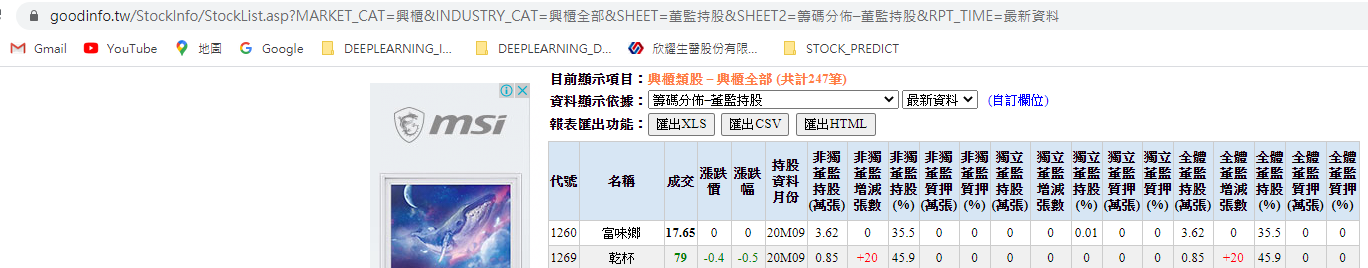

In [54]:
#董監持股' >籌碼分佈–董監持股
url = "https://goodinfo.tw/StockInfo/StockList.asp?MARKET_CAT=%E8%88%88%E6%AB%83&INDUSTRY_CAT=%E8%88%88%E6%AB%83%E5%85%A8%E9%83%A8&SHEET=%E8%91%A3%E7%9B%A3%E6%8C%81%E8%82%A1&SHEET2=%E7%B1%8C%E7%A2%BC%E5%88%86%E4%BD%88%E2%80%93%E8%91%A3%E7%9B%A3%E6%8C%81%E8%82%A1&RPT_TIME=%E6%9C%80%E6%96%B0%E8%B3%87%E6%96%99"
dfs_Director_Supervisor = GetStockListData(url, headers)

In [55]:
dfs_Director_Supervisor

,代號,名稱,成交,漲跌 價,漲跌 幅,持股 資料 月份,非獨 董監 持股 (萬張),非獨 董監 增減 張數,非獨 董監 持股 (%),非獨 董監 質押 (萬張),...,獨立 董監 持股 (萬張),獨立 董監 增減 張數,獨立 董監 持股 (%),獨立 董監 質押 (萬張),獨立 董監 質押 (%),全體 董監 持股 (萬張),全體 董監 增減 張數,全體 董監 持股 (%),全體 董監 質押 (萬張),全體 董監 質押 (%)
0,1260,富味鄉,17.65,0.00,0.00,20M09,3.62,0,35.50,0.00,...,0.0,0.0,0.01,0.0,0.0,3.62,0,35.50,0.00,0.00
1,1269,乾杯,79.00,-0.40,-0.50,20M09,0.85,+20,45.90,0.00,...,0.0,0.0,0.00,0.0,0.0,0.85,+20,45.90,0.00,0.00
2,1342,八貫,80.80,0.50,0.62,20M09,1.22,0,19.70,0.00,...,0.0,0.0,0.00,0.0,0.0,1.22,0,19.70,0.00,0.00
3,1563,巧新,51.20,-0.40,-0.78,20M09,1.57,+156,7.88,0.64,...,0.0,0.0,0.00,0.0,0.0,1.57,+156,7.88,0.64,41.10
4,1585,鎧鉅,8.15,-0.20,-2.40,20M09,0.67,0,12.40,0.00,...,0.0,0.0,0.00,0.0,0.0,0.67,0,12.40,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,8487,愛爾達,18.45,0.00,0.00,20M09,0.86,0,41.10,0.08,...,0.0,0.0,0.00,0.0,0.0,0.86,0,41.10,0.08,8.69
243,8490,利得,11.00,0.00,0.00,20M09,0.47,+400,10.50,0.00,...,0.0,0.0,0.00,0.0,0.0,0.47,+400,10.50,0.00,0.00
244,8491,真好玩,25.50,-0.80,-3.04,20M09,0.48,0,17.60,0.00,...,0.0,0.0,0.00,0.0,0.0,0.48,0,17.60,0.00,0.00
245,8492,兔將,20.65,-0.90,-4.18,20M09,0.55,0,25.60,0.00,...,0.0,0.0,0.00,0.0,0.0,0.55,0,25.60,0.00,0.00


In [54]:
dfs_Director_Supervisor = pd.read_csv('./csv_file/5_Director_Supervisor.csv')
dfs_Director_Supervisor.columns

Index(['Unnamed: 0', '代號', '名稱', '成交', '漲跌  價', '漲跌  幅', '持股  資料  月份',
       '非獨  董監  持股  (萬張)', '非獨  董監  增減  張數', '非獨  董監  持股  (%)',
       '非獨  董監  質押  (萬張)', '非獨  董監  質押  (%)', '獨立  董監  持股  (萬張)',
       '獨立  董監  增減  張數', '獨立  董監  持股  (%)', '獨立  董監  質押  (萬張)',
       '獨立  董監  質押  (%)', '全體  董監  持股  (萬張)', '全體  董監  增減  張數',
       '全體  董監  持股  (%)', '全體  董監  質押  (萬張)', '全體  董監  質押  (%)'],
      dtype='object')

In [55]:
dfs_Director_Supervisor_label_list = ['Unnamed: 0', '成交', '漲跌  價', '漲跌  幅']
dfs_Director_Supervisor = dfs_Director_Supervisor.drop(dfs_Director_Supervisor_label_list, axis=1)
dfs_Director_Supervisor

,代號,名稱,持股 資料 月份,非獨 董監 持股 (萬張),非獨 董監 增減 張數,非獨 董監 持股 (%),非獨 董監 質押 (萬張),非獨 董監 質押 (%),獨立 董監 持股 (萬張),獨立 董監 增減 張數,獨立 董監 持股 (%),獨立 董監 質押 (萬張),獨立 董監 質押 (%),全體 董監 持股 (萬張),全體 董監 增減 張數,全體 董監 持股 (%),全體 董監 質押 (萬張),全體 董監 質押 (%)
0,1260,富味鄉,20M09,3.62,0,35.50,0.00,0.00,0.0,0.0,0.01,0.0,0.0,3.62,0,35.50,0.00,0.00
1,1269,乾杯,20M09,0.85,+20,45.90,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.85,+20,45.90,0.00,0.00
2,1342,八貫,20M09,1.22,0,19.70,0.00,0.00,0.0,0.0,0.00,0.0,0.0,1.22,0,19.70,0.00,0.00
3,1563,巧新,20M09,1.57,+156,7.88,0.64,41.10,0.0,0.0,0.00,0.0,0.0,1.57,+156,7.88,0.64,41.10
4,1585,鎧鉅,20M09,0.67,0,12.40,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.67,0,12.40,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,8487,愛爾達,20M09,0.86,0,41.10,0.08,8.69,0.0,0.0,0.00,0.0,0.0,0.86,0,41.10,0.08,8.69
245,8490,利得,20M09,0.47,+400,10.50,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.47,+400,10.50,0.00,0.00
246,8491,真好玩,20M09,0.48,0,17.60,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.48,0,17.60,0.00,0.00
247,8492,兔將,20M09,0.55,0,25.60,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.55,0,25.60,0.00,0.00


## 5. KD指標  技術指標–KD指標

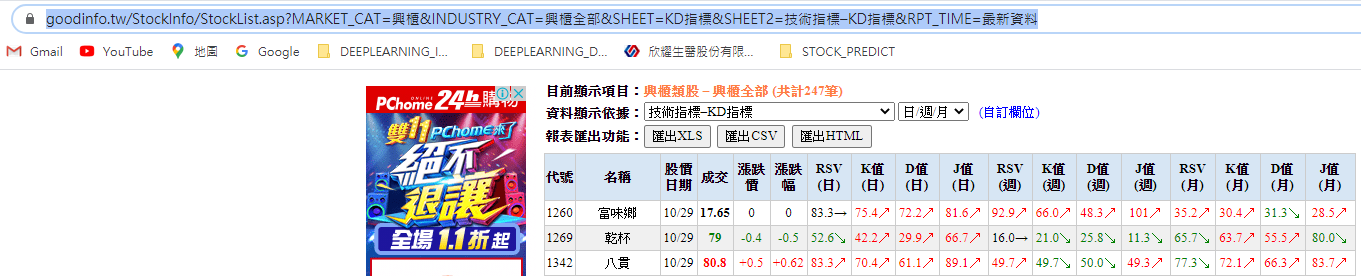

In [56]:
url_KD = "https://goodinfo.tw/StockInfo/StockList.asp?MARKET_CAT=%E8%88%88%E6%AB%83&INDUSTRY_CAT=%E8%88%88%E6%AB%83%E5%85%A8%E9%83%A8&SHEET=KD%E6%8C%87%E6%A8%99&SHEET2=%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99%E2%80%93KD%E6%8C%87%E6%A8%99&RPT_TIME=%E6%9C%80%E6%96%B0%E8%B3%87%E6%96%99"
dfs_KDJ = GetStockListData(url_KD, headers)

In [57]:
dfs_KDJ

,代號,名稱,股價 日期,成交,漲跌 價,漲跌 幅,RSV (日),K值 (日),D值 (日),J值 (日),RSV (週),K值 (週),D值 (週),J值 (週),RSV (月),K值 (月),D值 (月),J值 (月)
0,1260,富味鄉,10/29,17.65,0.00,0.00,83.3→,75.4↗,72.2↗,81.6↗,92.9↗,66.0↗,48.3↗,101↗,35.2↗,30.4↗,31.3↘,28.5↗
1,1269,乾杯,10/29,79.00,-0.40,-0.50,52.6↘,42.2↗,29.9↗,66.7↗,16.0→,21.0↘,25.8↘,11.3↘,65.7↘,63.7↗,55.5↗,80.0↘
2,1342,八貫,10/29,80.80,0.50,0.62,83.3↗,70.4↗,61.1↗,89.1↗,49.7↗,49.7↘,50.0↘,49.3↗,77.3↘,72.1↗,66.3↗,83.7↗
3,1563,巧新,10/29,51.20,-0.40,-0.78,30.8↗,37.3↘,38.8↘,34.1↘,27.4↘,45.5↘,50.6↘,35.2↘,50.2↘,46.7↗,42.8↗,54.4↗
4,1585,鎧鉅,10/29,8.15,-0.20,-2.40,83.3↘,88.8↘,84.4↗,97.7↘,88.2↗,62.2↗,49.8↗,87.0↗,91.5↗,58.4↗,46.2↗,82.8↗
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,8487,愛爾達,10/29,18.45,0.00,0.00,0.0→,3.6↘,11.5↘,-12.2↗,63.6→,66.9↘,60.5↗,79.5↘,67.4↗,57.6↗,49.0↗,74.8↗
243,8490,利得,10/29,11.00,0.00,0.00,47.1→,47.0↗,45.1↗,50.8↘,5.7→,9.0↘,12.3↘,2.3↘,2.9↘,7.5↘,11.7↘,-0.9↘
244,8491,真好玩,10/29,25.50,-0.80,-3.04,23.3↘,35.1↘,37.1↘,31.1↘,7.8↗,15.1↘,20.2↘,5.0↘,22.3↘,29.8↘,29.6↗,30.2↘
245,8492,兔將,10/29,20.65,-0.90,-4.18,36.4↘,68.4↘,73.4↘,58.5↘,73.8↘,81.2↘,80.4↗,82.7↘,85.4↘,64.1↗,44.7↗,103↗


## 6. 移動均量  技術指標–移動平均量

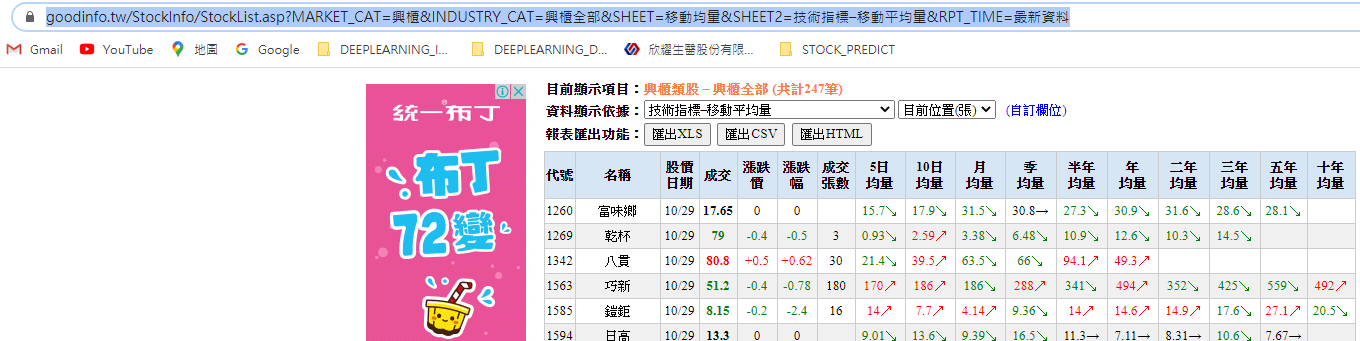

In [58]:
url_Average_Amount = "https://goodinfo.tw/StockInfo/StockList.asp?MARKET_CAT=%E8%88%88%E6%AB%83&INDUSTRY_CAT=%E8%88%88%E6%AB%83%E5%85%A8%E9%83%A8&SHEET=%E7%A7%BB%E5%8B%95%E5%9D%87%E9%87%8F&SHEET2=%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99%E2%80%93%E7%A7%BB%E5%8B%95%E5%B9%B3%E5%9D%87%E9%87%8F&RPT_TIME=%E6%9C%80%E6%96%B0%E8%B3%87%E6%96%99"
dfs_Average_Amount = GetStockListData(url_Average_Amount, headers)

In [59]:
dfs_Average_Amount

,代號,名稱,股價 日期,成交,漲跌 價,漲跌 幅,成交 張數,5日 均量,10日 均量,月 均量,季 均量,半年 均量,年 均量,二年 均量,三年 均量,五年 均量,十年 均量
0,1260,富味鄉,10/29,17.65,0.00,0.00,NaN,15.7↘,17.9↘,31.5↘,30.8→,27.3↘,30.9↘,31.6↘,28.6↘,28.1↘,NaN
1,1269,乾杯,10/29,79.00,-0.40,-0.50,3.0,0.93↘,2.59↗,3.38↘,6.48↘,10.9↘,12.6↘,10.3↘,14.5↘,NaN,NaN
2,1342,八貫,10/29,80.80,0.50,0.62,30.0,21.4↘,39.5↗,63.5↘,66↘,94.1↗,49.3↗,NaN,NaN,NaN,NaN
3,1563,巧新,10/29,51.20,-0.40,-0.78,180.0,170↗,186↗,186↘,288↗,341↘,494↗,352↘,425↘,559↘,492↗
4,1585,鎧鉅,10/29,8.15,-0.20,-2.40,16.0,14↗,7.7↗,4.14↗,9.36↘,14↗,14.6↗,14.9↗,17.6↘,27.1↗,20.5↘
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,8487,愛爾達,10/29,18.45,0.00,0.00,NaN,NaN,0.75→,2.09→,1.65→,5.43→,4.92→,5.29↘,5.03↘,NaN,NaN
243,8490,利得,10/29,11.00,0.00,0.00,2.0,13.1↘,30.7↘,35.9↘,65.3↗,44.3↗,26.2↗,16.8↗,15.6↗,NaN,NaN
244,8491,真好玩,10/29,25.50,-0.80,-3.04,31.0,26.1↘,27.1↗,26.8↗,39.7↘,113↘,85.6↘,97↘,105↘,NaN,NaN
245,8492,兔將,10/29,20.65,-0.90,-4.18,7.0,2.12↘,4.11↘,14.5↘,20.3↗,25.6↗,16.1↘,17.5↘,14.6↘,NaN,NaN


## 刪除 一些不需要的欄位

In [56]:
df_Average_Amount = pd.read_csv('./csv_file/6_Average_Amount.csv')
df_label_list = ['Unnamed: 0', '股價  日期', '成交', '漲跌  價', '漲跌  幅', 
                 '年  均量', '二年  均量', '三年  均量', '五年  均量', '十年  均量']
df_Average_Amount = df_Average_Amount.drop(df_label_list, axis=1)
df_Average_Amount.columns[1]

'名稱'

In [58]:
df_Average_Amount[190:195]

,代號,名稱,成交 張數,5日 均量,10日 均量,月 均量,季 均量,半年 均量
190,6729,機光科技,16.0,8.4↗,20.3↘,49↗,25.2↘,22.7↘
191,6730,常廣,NaN,4.79↘,7.31↘,14.4↘,20.4↘,16.9↘
192,6731,啟坤,NaN,3.6↘,4.9→,4.1↘,3.52↘,3.21↘
193,6733,博晟生醫,88.0,102↘,158↘,237↘,286↘,711↗
194,6734,安盛生,313.0,231↗,170↗,189↗,236↗,515↗


In [63]:
stock_list = df_Average_Amount['代號'].values.tolist()
stock_list

[1260,
 1269,
 1342,
 1563,
 1585,
 1594,
 1780,
 2071,
 2211,
 2237,
 2245,
 2246,
 2248,
 2249,
 2599,
 2721,
 2730,
 2733,
 2741,
 2750,
 2753,
 2755,
 2938,
 2942,
 2945,
 2947,
 3097,
 3117,
 3138,
 3150,
 3158,
 3168,
 3184,
 3349,
 3357,
 3391,
 3429,
 3430,
 3485,
 3585,
 3592,
 3595,
 3603,
 3627,
 3633,
 3659,
 3674,
 3678,
 3688,
 4117,
 4132,
 4136,
 4150,
 4151,
 4166,
 4169,
 4172,
 4186,
 4191,
 4194,
 4195,
 4197,
 4431,
 4440,
 4537,
 4544,
 4546,
 4553,
 4558,
 4559,
 4565,
 4573,
 4575,
 4577,
 4578,
 4582,
 4730,
 4732,
 4738,
 4765,
 4768,
 4770,
 4923,
 4925,
 4945,
 4951,
 4980,
 5222,
 5228,
 5233,
 5236,
 5240,
 5244,
 5248,
 5254,
 5262,
 5267,
 5271,
 5277,
 5292,
 5297,
 5547,
 5859,
 5863,
 6027,
 6028,
 6272,
 6403,
 6407,
 6423,
 6428,
 6434,
 6468,
 6473,
 6474,
 6475,
 6493,
 6495,
 6498,
 6515,
 6518,
 6529,
 6534,
 6536,
 6539,
 6543,
 6545,
 6546,
 6549,
 6550,
 6555,
 6559,
 6564,
 6565,
 6566,
 6572,
 6575,
 6580,
 6583,
 6584,
 6585,
 6586,
 6595,

In [64]:
stock_num = [1563]
  
print(len(stock_num))

1


## 7. MACD指標  技術指標–MACD指標

In [20]:
url_MACD = 'https://goodinfo.tw/StockInfo/StockList.asp?MARKET_CAT=%E8%88%88%E6%AB%83&INDUSTRY_CAT=%E8%88%88%E6%AB%83%E5%85%A8%E9%83%A8&SHEET=MACD&SHEET2=%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99%E2%80%93MACD&RPT_TIME=%E6%9C%80%E6%96%B0%E8%B3%87%E6%96%99'
dfs_MACD = GetStockListData(url_MACD, headers)

In [21]:
dfs_MACD

,代號,名稱,股價 日期,成交,漲跌 價,漲跌 幅,DIF (日),MACD (日),OSC (日),DIF (週),MACD (週),OSC (週),DIF (月),MACD (月),OSC (月)
0,1260,富味鄉,10/30,17.00,-0.65,-3.68,0.09↘,0.05↗,0.09↘,-0.77↗,-0.88↗,0.21↗,-1.94↘,-1.37↘,-1.15↗
1,1269,乾杯,10/30,78.00,-1.00,-1.27,-0.66↘,-0.58↘,-0.16↘,-0.05↘,0.65↘,-1.4↘,-10.6↗,-10.7↗,0.3↗
2,1342,八貫,10/30,78.20,-2.60,-3.22,0.22↘,0.48↘,-0.52↘,4.57↘,5.11↘,-1.09↘,4.23↗,1.47↗,5.51↘
3,1563,巧新,10/30,51.00,-0.20,-0.39,0.03↘,0.12↘,-0.18↘,0.04↗,-0.25↗,0.56↘,-7.41↗,-9.24↗,3.65↗
4,1585,鎧鉅,10/30,7.80,-0.35,-4.29,0.21↘,0.12↗,0.18↘,0.09↗,0.06↗,0.06↗,-0.5↗,-0.57↗,0.13↗
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,8487,愛爾達,10/30,18.45,0.00,0.00,0.07↘,0.12↘,-0.1↗,0.19↗,0.1↗,0.18↘,-2.29↗,-2.97↗,1.35↗
243,8490,利得,10/30,11.00,0.00,0.00,-0.38↗,-0.45↗,0.13↗,-2.53↗,-2.37↘,-0.32↗,-3.62↘,-2.43↘,-2.38↘
244,8491,真好玩,10/30,25.70,0.20,0.78,-0.78↘,-0.7↘,-0.16↗,-1.98↘,-1.69↘,-0.58↘,-9.69↘,-8.63↘,-2.11↗
245,8492,兔將,10/30,20.55,-0.10,-0.48,0.7↘,0.92↘,-0.45↘,1.89↗,1.17↗,1.44↘,-2.04↗,-3.2↗,2.32↗


# 基本面

In [68]:
url_Company_Infomation = 'https://goodinfo.tw/StockInfo/StockList.asp?MARKET_CAT=%E8%88%88%E6%AB%83&INDUSTRY_CAT=%E8%88%88%E6%AB%83%E5%85%A8%E9%83%A8&SHEET=%E5%85%AC%E5%8F%B8%E5%9F%BA%E6%9C%AC%E8%B3%87%E6%96%99&SHEET2=%E5%85%AC%E5%8F%B8%E5%9F%BA%E6%9C%AC%E8%B3%87%E6%96%99&RPT_TIME=%E6%9C%80%E6%96%B0%E8%B3%87%E6%96%99'
dfs_Company_Infomation = GetStockListData(url_Company_Infomation, headers)

In [69]:
dfs_Company_Infomation.to_csv('./csv_file/9_Company_Infomation.csv')

In [71]:
dfs_Company_Infomation.columns

Index(['代號', '名稱', '市  場', '股價  日期', '成交', '漲跌  價', '漲跌  幅', '面值  (元)',
       '股本  (億)', '發行量  (萬張)', '市值  (億)', '成立  年數', '上市  年數', '股票  期貨',
       '選擇  權', '權證', '公司  債', '私募  股', '特別  股', '產業別', '董事長', '總經理'],
      dtype='object')

In [70]:
dfs_Company_Infomation

,代號,名稱,市 場,股價 日期,成交,漲跌 價,漲跌 幅,面值 (元),股本 (億),發行量 (萬張),...,上市 年數,股票 期貨,選擇 權,權證,公司 債,私募 股,特別 股,產業別,董事長,總經理
0,1260,富味鄉,興,11/11,17.15,0.15,0.88,10.0,10.20,10.20,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,食品工業,陳昶宏,劉兆華
1,1269,乾杯,興,11/11,77.20,0.30,0.39,10.0,1.86,1.86,...,4.2,NaN,NaN,NaN,NaN,NaN,NaN,觀光事業,平出莊司,平出莊司
2,1342,八貫,興,11/11,74.60,-0.30,-0.40,10.0,6.20,6.20,...,1.1,NaN,NaN,NaN,NaN,NaN,NaN,塑膠工業,劉宗熹,劉宗熹
3,1563,巧新,興,11/11,51.80,-0.20,-0.38,10.0,19.90,19.90,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,電機機械,黃聰榮,黃聰榮
4,1585,鎧鉅,興,11/11,7.89,0.00,0.00,10.0,5.40,5.40,...,13.5,NaN,NaN,NaN,NaN,NaN,NaN,電子零組件業,林柄達,林柄達
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,8487,愛爾達,興,11/11,19.00,0.60,3.26,10.0,2.10,2.10,...,4.9,NaN,NaN,NaN,NaN,NaN,NaN,文化創意業,陳怡君,陳怡君
245,8490,利得,興,11/11,10.80,-0.40,-3.57,10.0,4.50,4.50,...,4.8,NaN,NaN,NaN,NaN,NaN,NaN,農業科技業,維豪國際有限公司,林進忠
246,8491,真好玩,興,11/11,25.10,0.00,0.00,10.0,2.75,2.75,...,4.8,NaN,NaN,NaN,NaN,NaN,NaN,文化創意業,周玄昆,劉志成
247,8492,兔將,興,11/11,22.35,-0.60,-2.61,10.0,2.15,2.15,...,4.5,NaN,NaN,NaN,NaN,NaN,NaN,文化創意業,李昭樺,李昭樺


# 個股查詢

In [339]:
#soup = bs4.BeautifulSoup(html.text, 'html.parser')
def GetStock3MonthPriceData(STOCK_ID):
    """STOCK_ID: 股票代號
       資料形態: int
       
       return: dataframe 含 最近3個月交易狀態
       交易 日期	開盤	最高	最低	收盤	張數	筆數
    """
    
    """將股票走勢 畫圖
       
       需要資訊：
       開盤	最高	最低	收盤
    """
    url = "https://goodinfo.tw/StockInfo/ShowK_Chart.asp?STOCK_ID="+str(STOCK_ID)+"&CHT_CAT2=DATE"
    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}
    res = requests.get(url,headers=headers)
    res.encoding = "utf-8"
    
    soup = bs4.BeautifulSoup(res.text,"lxml")
    data = soup.select_one("#divPriceDetail") # 抓 ID
    
    df = pd.read_html(data.prettify())
    dfs = df[0]
    dfs.head()
    dfs.columns = dfs.columns.get_level_values(7)
    
    #過濾 不需要的 label 欄位
    dfs_label_list = ['漲跌', '漲跌  (%)', '振幅  (%)', '均張','億元','外資', '投信', '自營', '合計', '外資  持股  (%)',
                        '增減', '餘額','增減', '餘額', '券資  比  (%)']
    dfs = dfs.drop(dfs_label_list, axis=1)
    
    dfs_plot_label_list = ['交易  日期', '張數', '筆數']
    dfs_plot = dfs.drop(dfs_plot_label_list, axis=1)

    #轉換成 以前的資料為最上
    dfs_plot = dfs_plot.iloc[::-1]

    #設定 index 從 0 開始
    dfs_plot.index = range(len(dfs_plot))


    return dfs, dfs_plot

In [340]:
dfs, dfs_plot = GetStock3MonthPriceData(4151)

AttributeError: 'NoneType' object has no attribute 'prettify'

In [327]:
dfs[0:3]

,交易 日期,開盤,最高,最低,收盤,張數,筆數
0,11/12,24.35,24.1,23.00,24.10,339,171
1,11/11,25.30,25.7,24.00,24.35,243,120
2,11/10,25.40,27.0,24.65,25.30,334,159


In [328]:
dfs_plot[0:3]

,開盤,最高,最低,收盤
0,12.80,12.95,12.20,12.55
1,12.55,13.00,12.45,13.00
2,13.00,13.40,12.75,13.00


In [329]:
import talib
from matplotlib import pyplot as plt
def plot_dfs(dfs_new):
    #提取收盘价
    closed=dfs_new['收盤'].values
    #获取均线的数据，通过timeperiod参数来分别获取 5,10,20 日均线的数据。
    ma5=talib.SMA(closed,timeperiod=5)
    ma10=talib.SMA(closed,timeperiod=10)
    ma20=talib.SMA(closed,timeperiod=30)
    
    plt.figure(figsize=(6,4), facecolor='w',edgecolor='black')
    #plt.figure(figsize=(12,8))
    #'開盤', '最高', '最低', '收盤',
    plt.plot(dfs_new['收盤'].values, 'gX-', linewidth=3, label='Close')
    plt.plot(ma5, 'y', label='5MA')
    plt.plot(ma10, 'purple', label='10MA')
    plt.plot(ma20, 'cyan', label='20MA')
    plt.legend()
    plt.title('3 Month Data')
    
    #添加网格，可有可无，只是让图像好看点
    plt.grid()
    #记得加这一句，不然不会显示图像
    
    plt.show()
    saveImage_path = './IMAGE/stock.png'
    plt.savefig(saveImage_path)
    
    return saveImage_path

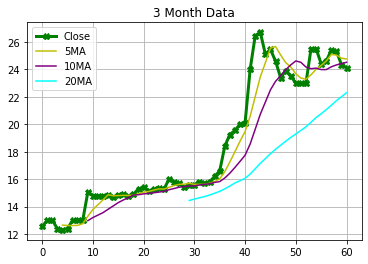

<Figure size 432x288 with 0 Axes>

In [330]:
saveImage_path = plot_dfs(dfs_plot)

In [ ]:
url = "https://goodinfo.tw/StockInfo/ShowK_Chart.asp?STOCK_ID=1260&CHT_CAT2=DATE"

In [ ]:
res = requests.get(url,headers=headers)
res.encoding = "utf-8"

In [140]:
soup = bs4.BeautifulSoup(res.text,"lxml")

In [141]:
data = soup.select_one("#divPriceDetail") # 抓 ID

In [142]:
df = pd.read_html(data.prettify())

In [143]:
len(df)

1

In [144]:
dfs = df[0]

In [145]:
dfs

交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)  成交資料        ...  \
   交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)    張數    筆數  ...   
   交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)  成交資料  成交資料  ...   
   交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)    張數    筆數  ...   
   交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)  成交資料  成交資料  ...   
   交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)    張數    筆數  ...   
   交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)  成交資料  成交資料  ...   
   交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)    張數    筆數  ...   
0   11/11  17.00  17.15  17.15  17.15  0.15    0.88    0.00   5.0   5.0  ...   
1   11/10  17.15  17.25  16.75  17.00 -0.15   -0.87    2.92  24.0  10.0  ...   
2   11/09  17.25  17.40  16.70  17.15 -0.10   -0.58    4.06  21.0  12.0  ...   
3   11/06  17.25  17.25  17.25  17.25  0.00    0.00    0.00   1.0   1.0  ...   
4   11/05  17.20  17.25  17.25  17.25  0.05    0.29    0.00   0.0   1.0  ...   
5   11/04  17.20  17.20  17.20  17.20  0.00    0.00    0.00   NaN   NaN  ...   
6   11/03  17.00  17.20  16.75  17.20  0.20    1.18    2.65  23.0   9.0  ...   
7   11/02  17.00  17.00  16.85  17.00  0.00    0.00    0.88  29.0  12.0  ...   
8   10/30  17.65  17.30  17.00  17.00 -0.65   -3.68    1.70  29.0  10.0  ...   
9   10/29  17.65  17.65  17.65  17.65  0.00    0.00    0.00   NaN   NaN  ...   
10  10/28  17.50  17.70  17.65  17.65  0.15    0.86    0.29   5.0   2.0  ...   
11  10/27  17.10  17.70  17.00  17.50  0.40    2.34    4.09   4.0   6.0  ...   
12  10/26  17.30  17.75  17.00  17.10 -0.20   -1.16    4.34  23.0  14.0  ...   
13  10/23  17.60  17.70  17.10  17.30 -0.30   -1.70    3.41  46.0  21.0  ...   
14  10/22  17.30  17.80  17.30  17.60  0.30    1.73    2.89   6.0   5.0  ...   
15  10/21  17.40  17.40  16.90  17.30 -0.10   -0.57    2.87  61.0  22.0  ...   
16  10/20  17.30  17.70  17.15  17.40  0.10    0.58    3.18  15.0   6.0  ...   
17  10/19  17.25  17.50  17.20  17.30  0.05    0.29    1.74   7.0   5.0  ...   
18  10/16  17.40  17.25  17.20  17.25 -0.15   -0.86    0.29  11.0   4.0  ...   
19  10/15  16.75  17.50  17.20  17.40  0.65    3.88    1.79  37.0  21.0  ...   
20  10/14  16.50  17.40  16.60  16.75  0.25    1.52    4.85  62.0  25.0  ...   
21  10/13  16.40  16.80  16.45  16.50  0.10    0.61    2.13  42.0  10.0  ...   
22  10/12  15.90  16.80  16.10  16.40  0.50    3.14    4.40  92.0  23.0  ...   
23  10/08  17.00  16.40  15.70  15.90 -1.10   -6.47    4.12  98.0  32.0  ...   
24  10/07  17.00  17.00  17.00  17.00  0.00    0.00    0.00   1.0   1.0  ...   
25  10/06  16.90  17.00  17.00  17.00  0.10    0.59    0.00   3.0   4.0  ...   
26  10/05  16.55  16.90  16.55  16.90  0.35    2.11    2.11   6.0   7.0  ...   
27  09/30  16.20  16.55  16.55  16.55  0.35    2.16    0.00   1.0   1.0  ...   
28  09/29  16.40  17.05  16.00  16.20 -0.20   -1.22    6.40  70.0  18.0  ...   
29  09/28  16.50  17.05  16.40  16.40 -0.10   -0.61    3.94  71.0  24.0  ...   
30  09/25  16.50  17.35  15.80  16.50  0.00    0.00    9.39  76.0  32.0  ...   
31  09/24  17.30  17.50  16.50  16.50 -0.80   -4.62    5.78  50.0  18.0  ...   
32  09/23  17.55  17.60  17.10  17.30 -0.25   -1.42    2.85  29.0  12.0  ...   
33  09/22  17.05  17.65  17.25  17.55  0.50    2.93    2.35   3.0   4.0  ...   
34  09/21  17.70  17.40  17.05  17.05 -0.65   -3.67    1.98  45.0  12.0  ...   
35  09/18  17.55  17.70  17.70  17.70  0.15    0.85    0.00   1.0   1.0  ...   
36  09/17  17.55  17.75  17.55  17.55  0.00    0.00    1.14  10.0   7.0  ...   
37  09/16  17.50  17.55  17.30  17.55  0.05    0.29    1.43  43.0  15.0  ...   
38  09/15  17.00  17.50  17.00  17.50  0.50    2.94    2.94   6.0   5.0  ...   
39  09/14  17.45  17.00  17.00  17.00 -0.45   -2.58    0.00   1.0   1.0  ...   
40  09/11  17.45  17.45  17.45  17.45  0.00    0.00    0.00   NaN   NaN  ...   
41  09/10  17.20  17.45  16.95  17.45  0.25    1.45    2.91  29.0   8.0  ...   
42 

In [146]:
dfs.head()

交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)  成交資料        ...  \
  交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)    張數    筆數  ...   
  交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)  成交資料  成交資料  ...   
  交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)    張數    筆數  ...   
  交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)  成交資料  成交資料  ...   
  交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)    張數    筆數  ...   
  交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)  成交資料  成交資料  ...   
  交易  日期     開盤     最高     最低     收盤    漲跌 漲跌  (%) 振幅  (%)    張數    筆數  ...   
0  11/11  17.00  17.15  17.15  17.15  0.15    0.88    0.00   5.0   5.0  ...   
1  11/10  17.15  17.25  16.75  17.00 -0.15   -0.87    2.92  24.0  10.0  ...   
2  11/09  17.25  17.40  16.70  17.15 -0.10   -0.58    4.06  21.0  12.0  ...   
3  11/06  17.25  17.25  17.25  17.25  0.00    0.00    0.00   1.0   1.0  ...   
4  11/05  17.20  17.25  17.25  17.25  0.05    0.29    0.00   0.0   1.0  ...   

  法人買賣超(張)                            外資  持股  (%) 融資(張)       融券(張)        \
        外資       投信       自營       合計 外資  持股  (%)    增減    餘額    增減    餘額   
  法人買賣超(張) 法人買賣超(張) 法人買賣超(張) 法人買賣超(張) 外資  持股  (%) 融資(張) 融資(張) 融券(張) 融券(張)   
        外資       投信       自營       合計 外資  持股  (%)    增減    餘額    增減    餘額   
  法人買賣超(張) 法人買賣超(張) 法人買賣超(張) 法人買賣超(張) 外資  持股  (%) 融資(張) 融資(張) 融券(張) 融券(張)   
        外資       投信       自營       合計 外資  持股  (%)    增減    餘額    增減    餘額   
  法人買賣超(張) 法人買賣超(張) 法人買賣超(張) 法人買賣超(張) 外資  持股  (%) 融資(張) 融資(張) 融券(張) 融券(張)   
        外資       投信       自營       合計 外資  持股  (%)    增減    餘額    增減    餘額   
0      NaN      NaN      NaN      NaN           0   NaN   NaN   NaN   NaN   
1      NaN      NaN      NaN      NaN           0   NaN   NaN   NaN   NaN   
2      NaN      NaN      NaN      NaN           0   NaN   NaN   NaN   NaN   
3      NaN      NaN      NaN      NaN           0   NaN   NaN   NaN   NaN   
4      NaN      NaN      NaN      NaN           0   NaN   NaN   NaN   NaN   

  券資  比  (%)  
  券資  比  (%)  
  券資  比  (%)  
  券資  比  (%)  
  券資  比  (%)  
  券資  比  (%)  
  券資  比  (%)  
  券資  比  (%)  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 22 columns]

In [147]:
dfs.columns = dfs.columns.get_level_values(7)

In [148]:
dfs.columns

Index(['交易  日期', '開盤', '最高', '最低', '收盤', '漲跌', '漲跌  (%)', '振幅  (%)', '張數',
       '筆數', '均張', '億元', '外資', '投信', '自營', '合計', '外資  持股  (%)', '增減', '餘額',
       '增減', '餘額', '券資  比  (%)'],
      dtype='object')

In [149]:
dfs_stock = dfs

In [150]:
dfs_stock[1:5]

,交易 日期,開盤,最高,最低,收盤,漲跌,漲跌 (%),振幅 (%),張數,筆數,...,外資,投信,自營,合計,外資 持股 (%),增減,餘額,增減,餘額,券資 比 (%)
1,11/10,17.15,17.25,16.75,17.00,-0.15,-0.87,2.92,24.0,10.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,11/09,17.25,17.40,16.70,17.15,-0.10,-0.58,4.06,21.0,12.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,11/06,17.25,17.25,17.25,17.25,0.00,0.00,0.00,1.0,1.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,11/05,17.20,17.25,17.25,17.25,0.05,0.29,0.00,0.0,1.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [134]:
dfs_stock.iloc[1]['交易  日期']

'2020/11/10'

In [151]:
dfs_stock[1:5]

,交易 日期,開盤,最高,最低,收盤,漲跌,漲跌 (%),振幅 (%),張數,筆數,...,外資,投信,自營,合計,外資 持股 (%),增減,餘額,增減,餘額,券資 比 (%)
1,11/10,17.15,17.25,16.75,17.00,-0.15,-0.87,2.92,24.0,10.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,11/09,17.25,17.40,16.70,17.15,-0.10,-0.58,4.06,21.0,12.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,11/06,17.25,17.25,17.25,17.25,0.00,0.00,0.00,1.0,1.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,11/05,17.20,17.25,17.25,17.25,0.05,0.29,0.00,0.0,1.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [152]:
dfs.columns

Index(['交易  日期', '開盤', '最高', '最低', '收盤', '漲跌', '漲跌  (%)', '振幅  (%)', '張數',
       '筆數', '均張', '億元', '外資', '投信', '自營', '合計', '外資  持股  (%)', '增減', '餘額',
       '增減', '餘額', '券資  比  (%)'],
      dtype='object')

In [153]:
dfs_stock_label_list = ['漲跌', '漲跌  (%)', '振幅  (%)', '均張','億元','外資', '投信', '自營', '合計', '外資  持股  (%)',
                        '增減', '餘額','增減', '餘額', '券資  比  (%)']
dfs_stock = dfs_stock.drop(dfs_stock_label_list, axis=1)

In [7]:
dfs_stock

NameError: name 'dfs_stock' is not defined

## 打分數函數

In [31]:
def computer_score(numA):
    score = 0
    if numA > 0 and numA < 5:
        score = 1
    if numA > 5 and numA < 10:
        score = 2
    if numA > 10 and numA < 20:
        score = 4
    if numA > 20 and numA < 30:
        score = 6
    if numA > 30 and numA < 40:
        score = 8
    if numA > 40 and numA < 50:
        score = 10
    if numA > 50:
        score = 15
    return score

In [33]:
score = 0
score = computer_score(6)
score

2